In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import calendar

import plotly.express as px

In [2]:
users = pd.read_csv("/Users/pedrorodriguez/Desktop/Springboard/Chapters/25-  Data Science Interview Process/Relax Inc-Take-Home Challenge/takehome_users.csv", encoding='latin-1')

eng = pd.read_csv("/Users/pedrorodriguez/Desktop/Springboard/Chapters/25-  Data Science Interview Process/Relax Inc-Take-Home Challenge/takehome_user_engagement.csv")


In [3]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
#Let's convert the time_stamp to datetime
eng['time_stamp'] = pd.to_datetime(eng['time_stamp'], format= '%Y-%m-%d %H:%M:%S')

In [6]:
eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
eng['visited'].unique()

array([1])

Because all the visited values are 1, I will create a definition to regroup the data by 7 days period and selected those with three separate days logins in at least one seven­ day period. 

In [8]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.
def log_by_days(df, days=7, logins=3):
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [9]:
adopt = eng.groupby('user_id').apply(log_by_days)
adopt.name = 'adopt'

In [10]:
adopt.head()

user_id
1    False
2     True
3    False
4    False
5    False
Name: adopt, dtype: bool

In [11]:
print('From {} users, there were {} adopted users, this is {}%.'.format(len(adopt), sum(adopt), round((sum(adopt)/len(adopt))*100 , 2)))

From 8823 users, there were 1656 adopted users, this is 18.77%.


### Now that we found the adopted users, I'm going to merge them and determine which features are necessary to create a prediction model. 

In [12]:
users = users.rename(columns={'object_id': 'user_id'})
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [13]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format= '%Y-%m-%d %H:%M:%S')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [15]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [16]:
adopt = adopt.reset_index()
adopt.to_csv('/Users/pedrorodriguez/Desktop/Springboard/Chapters/25-  Data Science Interview Process/Relax Inc-Take-Home Challenge/adopt.csv')

In [17]:
df = pd.merge(users, adopt, on='user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  adopt                       8823 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), obj

In [18]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


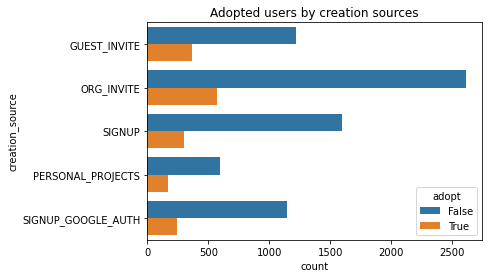

In [19]:
for col in ['creation_source']:
    sns.countplot(y = col, hue = 'adopt', data = df )
    plt.title('Adopted users by creation sources')
    plt.show()

In [20]:
organization = df[df['creation_source'] == 'ORG_INVITE']
organization['org_id'].unique()

array([  1,  94, 318, 254,   7,   6, 134,  64, 127,  32, 224,   0, 304,
        88, 215, 141, 389,  49, 172,   8,  43, 249,  10, 130, 196, 335,
       375, 295, 301, 268, 112, 313, 261, 264,  60,  28, 374,  15, 225,
       255, 415,  11, 139, 290,  30, 122, 135, 328, 107, 263, 342, 303,
       142, 275, 278,   2, 102,  56, 154, 218,  76, 371,  50,  75, 333,
        89, 213, 192,  27, 300,  68, 332,   3, 147,  18,  69, 231,  16,
       156, 272, 414, 129,  92, 165,  71, 105,   9, 185,  39, 361, 143,
       413,  58, 128, 334, 229, 381, 205,  42,  25, 262, 366,  52, 120,
       296, 339,   4, 236,  45, 104, 160, 380,  61, 117,  73, 372,  26,
       306,  40, 144, 349, 174,  79, 284,  80, 193, 114, 126, 157,  65,
       281,  77, 326,  63,  97, 266,  20,  36, 406,  23, 297, 309,  24,
       358, 227, 149,  38, 177, 288, 138,  54, 119,  96, 108,  67, 311,
       293, 216,  22,  87,  78,  31, 115, 113,  84, 269, 350, 184, 244,
        86, 368, 118, 223, 256, 373,  85,  41, 203,  33, 116, 27

In [21]:
org_id = organization.groupby('org_id')[['user_id']].count().reset_index().sort_values(['user_id'], ascending= False)
org_id.head(15)

,org_id,user_id
0,0,75
1,1,62
3,3,53
2,2,52
4,4,47
6,6,44
9,9,41
5,5,32
7,7,27
10,10,25


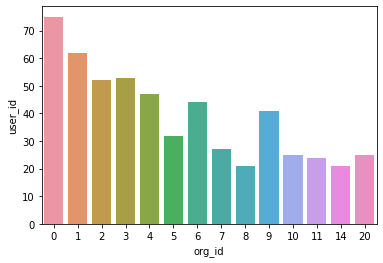

In [22]:
org_id = org_id[org_id['user_id'] > 20].sort_values(['user_id'], ascending= False)

sns.barplot(x= 'org_id', y= 'user_id', data= org_id)

We know the 18.77% are users adopted, users logged three times in the 7-day periods. From that 18%, most of the invited users were by the organization. Overalls, the organization was actively inviting users, making them the most inviting adopted and non-adopted users. We also know the top organization inviting users is the number '0.' with 72 invitations, followed by number 1 with 62 invitations.  

I want to investigate any pattern throughout the year. Answer questions like there are high seasons on users logging? Are the users logging in the most on weekdays or weekends?

In [23]:
import datetime

df['date'] = pd.to_datetime([d.date() for d in df['creation_time']])
df['day'] = [datetime.datetime.strftime(pd.to_datetime(x), "%a") 
                for x in df.creation_time.values]

df['month'] = [datetime.datetime.strftime(pd.to_datetime(x), "%b") 
                  for x in df.creation_time.values]

In [24]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopt,date,day,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,2014-04-22,Tue,Apr
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,2013-11-15,Fri,Nov
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,2013-03-19,Tue,Mar
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,2013-05-21,Tue,May
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,2013-01-17,Thu,Jan


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  adopt                       8823 non-null   bool          
 11  date                        8823 non-null   datetime64[n

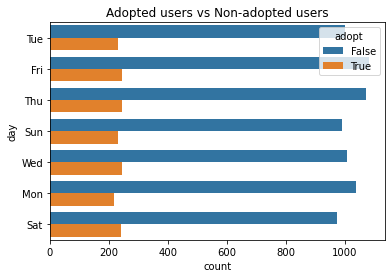

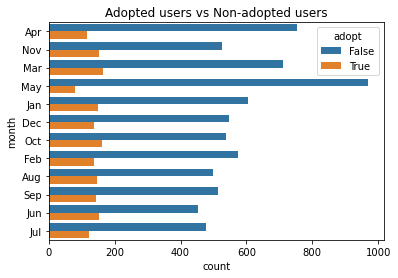

In [26]:
for col in ['day', 'month']:
    sns.countplot(y = col, hue = 'adopt', data = df )
    plt.title('Adopted users vs Non-adopted users')
    plt.show()

There is no underlying pattern in the adopted and non-adopted users logging through the week. But, when we see the data by month seems like non-adopted users are actively logging during May, but the adopted users are not. The non-adopted users seem consistent every month except in May, the lowest month logging throughout the year. 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  adopt                       8823 non-null   bool          
 11  date                        8823 non-null   datetime64[n

In [28]:
#Im going to drop every unnecessary column for the prediction model
df = df.drop(['user_id', 'name', 'email', 'last_session_creation_time', 'invited_by_user_id'], axis= 1)

In [29]:
df['adopt'] = df['adopt'].astype(int)

In [30]:
df.head()

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopt,date,day,month
0,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,0,2014-04-22,Tue,Apr
1,2013-11-15 03:45:04,ORG_INVITE,0,0,1,1,2013-11-15,Fri,Nov
2,2013-03-19 23:14:52,ORG_INVITE,0,0,94,0,2013-03-19,Tue,Mar
3,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,0,2013-05-21,Tue,May
4,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,0,2013-01-17,Thu,Jan


In [31]:
# Create dummy for the following features: creation_source, day, month
df = pd.get_dummies(df, columns = ['creation_source','day','month'] )
df.head()

,creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopt,date,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,2014-04-22 03:53:30,1,0,11,0,2014-04-22,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-11-15 03:45:04,0,0,1,1,2013-11-15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2013-03-19 23:14:52,0,0,94,0,2013-03-19,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2013-05-21 08:09:28,0,0,1,0,2013-05-21,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2013-01-17 10:14:20,0,0,193,0,2013-01-17,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
a = df.corr().abs()
b = a.unstack()
c = b.sort_values(ascending= False)
c = c.reset_index()
c1 = c[c['level_0'] == 'adopt'].rename(columns= {'level_1': 'features', 0: 'corr'})
c1.head(18)

,level_0,features,corr
23,adopt,adopt,1.000000
106,adopt,month_May,0.106248
217,adopt,org_id,0.077748
228,adopt,creation_source_GUEST_INVITE,0.053605
230,adopt,month_Apr,0.046541
233,adopt,month_Jun,0.045307
235,adopt,creation_source_SIGNUP,0.038315
239,adopt,month_Oct,0.032659
255,adopt,creation_source_PERSONAL_PROJECTS,0.029523
261,adopt,month_Aug,0.026923


There is no strong correlation between adopt data with the rest of the features. But it seems that May have more correlation than others month. Let's remember in the previews graph show in May adopt decrease and non-adopt increase during this time. 

In [33]:
fig = px.imshow(df.corr(), width=1000, height=800)
fig.show()

In [34]:
df.to_csv('/Users/pedrorodriguez/Desktop/Springboard/Chapters/25-  Data Science Interview Process/Relax Inc-Take-Home Challenge/new_data.csv')

## Prediction model

Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process. You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   creation_time                       8823 non-null   datetime64[ns]
 1   opted_in_to_mailing_list            8823 non-null   int64         
 2   enabled_for_marketing_drip          8823 non-null   int64         
 3   org_id                              8823 non-null   int64         
 4   adopt                               8823 non-null   int64         
 5   date                                8823 non-null   datetime64[ns]
 6   creation_source_GUEST_INVITE        8823 non-null   uint8         
 7   creation_source_ORG_INVITE          8823 non-null   uint8         
 8   creation_source_PERSONAL_PROJECTS   8823 non-null   uint8         
 9   creation_source_SIGNUP              8823 non-null   uint8         
 10  creation_source_SIGNUP_G

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

del df['creation_time']
del df['date']
X = df.drop('adopt', axis= 1)
y = df['adopt']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(7058, 27) (1765, 27)


In [37]:
clf= RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

print(classification_report(y_test, y_pred))
print("\n\nAccuracy:", round(metrics.accuracy_score(y_test, y_pred)*100, 3))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1417
           1       0.29      0.16      0.21       348

    accuracy                           0.76      1765
   macro avg       0.55      0.53      0.53      1765
weighted avg       0.71      0.76      0.73      1765



Accuracy: 75.751


In [38]:
imp_fea = pd.Series(clf.feature_importances_, index=X.columns)
imp_fea = imp_fea.sort_values(ascending=False).reset_index().rename(columns={'index':'features', 0: 'importance level'})
print(imp_fea)

                              features  importance level
0                               org_id          0.606394
1             opted_in_to_mailing_list          0.039292
2           enabled_for_marketing_drip          0.029461
3                              day_Thu          0.018300
4                              day_Sun          0.017768
5                              day_Fri          0.017519
6                              day_Tue          0.017340
7                              day_Sat          0.017118
8                              day_Wed          0.017023
9           creation_source_ORG_INVITE          0.016966
10                             day_Mon          0.014143
11  creation_source_SIGNUP_GOOGLE_AUTH          0.014064
12                           month_May          0.013609
13                           month_Mar          0.013397
14                           month_Jan          0.013122
15              creation_source_SIGNUP          0.012753
16                           mo

The most important feature to predict the Adopted users is the organization ID with 60%, then the "opted_in_to_mailing_list" with 3%.